In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.seterr(all='ignore')
np.random.seed(123)

In [2]:
# dummy data
X = np.random.rand(1000,20).T
y = np.random.randint(0,2,1000).T
print(X.shape)

(20, 1000)


In [3]:
def make_dummies(df):
    
    dummies_list = ['purpose', 'verification_status', 'application_type', 
                    'pymnt_plan', 'home_ownership', 'grade', 'sub_grade','addr_state']
    drop_list = ['zip_code']
    for x in dummies_list:
        dummies = pd.get_dummies(df[x])
        dummies = dummies.add_prefix(x+"_")
        df = pd.concat([df, dummies], axis=1)
    df= df.drop(columns=dummies_list + drop_list)
    return df

# load training data (we're not doing cross-validation in this notebook)
df = pd.read_csv('../data/lendingclub_cleaned/Loan_data.csv', low_memory = False,index_col=0)

# make dummies out of categoricals
df = make_dummies(df)

# make sure everything is numerical
df['loan_status'] = (df['loan_status'] == 'Fail')
for col in df.columns:
    df[col] = df[col].astype('float')
    
print(df.shape)

(107260, 157)


In [4]:
df

,loan_status,loan_amnt,term,int_rate,installment,annual_inc,emp_length,dti,fico_range_high,fico_range_low,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
id,,,,,,,,,,,,,,,,,,,,,
126413292,0.0,25000.0,60.0,12.62,563.98,245000.0,7.0,34.26,664.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126419328,0.0,10000.0,36.0,9.44,320.05,54000.0,3.0,13.40,669.0,665.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126302604,0.0,20000.0,36.0,6.72,614.99,400000.0,10.0,4.86,684.0,680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126367756,0.0,27000.0,60.0,9.93,572.75,68000.0,3.0,30.04,754.0,750.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126154990,0.0,4000.0,36.0,10.42,129.86,115000.0,10.0,15.72,699.0,695.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126412156,0.0,16000.0,60.0,25.82,477.35,51000.0,10.0,27.53,679.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126380861,0.0,40000.0,36.0,6.08,1218.33,203000.0,6.0,9.81,754.0,750.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126383635,0.0,13000.0,36.0,9.93,419.05,85000.0,10.0,7.99,664.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125149625,0.0,10000.0,60.0,10.42,214.55,78000.0,3.0,21.92,749.0,745.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# set up data for classification
# class label: default
y = df['loan_status'].values.reshape(1,-1)
print(y.shape)

# features: the remaining columns
X = df.drop(columns = 'loan_status').values.T

# standardise inputs
X = (X - np.mean(X,axis=1).reshape(-1,1)) / np.std(X,axis=1).reshape(-1,1)
print(X.shape)

(1, 107260)
(156, 107260)


In [6]:
y

array([[0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# sigmoid function
def sigmoid(A):
    return 1/(1+np.exp(-A))

# baby backprop
def babybackprop(X,y,W):
    
    # forward pass to get prediction
    A = np.dot(W,X)
    yhat = sigmoid(A)
    
    # derivative of loss with respect to a
    dA = yhat - y
    
    # average derivative of loss with respect to W
    grad = np.matmul(dA,X.T) / X.shape[1]

    return grad

# cross entropy loss
def cross_entropy(yhat,y):
    L = - y * np.log(yhat) - (1-y) * np.log(1-yhat)
    loss = np.sum(L) / yhat.shape[1]
    return loss

In [ ]:
# exercise: logit with gradient descent 

# logit initialisation
p = X.shape[0]
W = np.random.rand(1,p) * 0.01

# learning rate
learning_rate = 0.1

# number of steps for gradient descent
steps = 5000

# initialize list to hold losses over time
losses_logit = []

for i in tqdm(range(steps)):
    
    # TODO get gradients using baby backprop (1 line)
    
    # TODO update parameters using gradient descent (1 line)
    
    # TODO get cross-entropy loss (3-4 lines)

    # append loss to list
    losses_logit.append(loss)

# visualise learning over time
plt.plot(range(steps),losses_logit)    
plt.xlabel('Iteration')
plt.ylabel('Loss')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:17<00:00, 28.29it/s]


Text(0,0.5,'Loss')

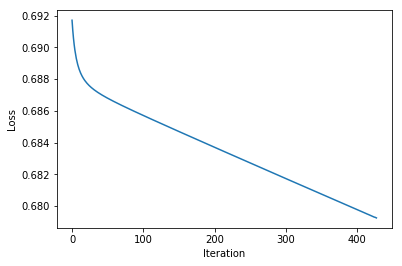

In [9]:
# %load logit_gd_solution.py
# logit initialisation
p = X.shape[0]
W = np.random.rand(1,p) * 0.01

# learning rate
learning_rate = 0.1

# number of steps for gradient descent
steps = 500

# initialize list to hold losses over time
losses_logit = []

for i in tqdm(range(steps)):
    
    # get gradients using baby backprop (1 line)
    grad = babybackprop(X,y,W)
    
    # update parameters using gradient descent (1 line)
    W -= learning_rate * grad
    
    # cross-entropy loss (1 or 2 lines)
    A = np.dot(W,X)
    yhat = sigmoid(A)
    loss = cross_entropy(yhat,y)
    losses_logit.append(loss)

# visualise learning over time
plt.plot(range(steps),losses_logit)    
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [10]:
# exercise: grown up backprop

# ReLU activation
def relu(A):
    H = A
    H[H<0] = 0
    return H

# grown up forward and backward pass
def forward(X,pars):
    
    # setup lists for activations and outputs
    As, Hs = [],[]
    
    # initialize input as raw data
    H = X
    
    # loop over layers
    for j in range(len(pars)):
        
        # parameters for this layer      
        W = pars[j]['weight']
        b = pars[j]['bias']
        
        # activations and output
        A = np.dot(W,H) + b
        H = sigmoid(A) if j+1 == len(pars) else relu(A)
        As.append(A)
        Hs.append(H)
    
    return As, Hs

def backprop(X,y,As,Hs,pars):
    
    # setup list for gradients
    grads = []
    
    # batch size
    m = X.shape[1]
    
    for j in range(len(pars))[::-1]:
        A = As[j]
        H = Hs[j]
        W = pars[j]['weight']
        
        # get activations gradient: from output gradient except in output layer
        dA = H - y if j+1 == len(pars) else (A > 0) * dH
        
        # get input from previous layer
        H_back = Hs[j-1] if j>0 else X
        
        # get parameter gradients
        # TODO complete code for dW (1 line)
        dW = None
        db = np.sum(dA,axis=1).reshape(-1,1) / m 
        grads.append({'weight' : dW, 'bias' : db})
        
        # move to next layer
        if j>0: dH = np.dot(W.T,dA)
                     
    return grads[::-1]

In [11]:
# %load backprop_solution.py
def backprop(X,y,As,Hs,pars):
    
    # setup list for gradients
    grads = []
    
    # batch size
    m = X.shape[1]
    
    for j in range(len(pars))[::-1]:
        A = As[j]
        H = Hs[j]
        W = pars[j]['weight']
        
        # get activations gradient: from output gradient except in output layer
        dA = H - y if j+1 == len(pars) else (A > 0) * dH
        
        # get input from previous layer
        H_back = Hs[j-1] if j>0 else X
        
        # get parameter gradients
        dW = np.dot(dA,H_back.T) / m
        db = np.sum(dA,axis=1).reshape(-1,1) / m 
        grads.append({'weight' : dW, 'bias' : db})
        
        # move to next layer
        if j>0: dH = np.dot(W.T,dA)
                     
    return grads[::-1]

In [ ]:
# exercise: deep neural net from scratch

# number of layers (including output)
l = 3

# number of hidden units
n_hidden = [20,6]

# infer inputs and outputs for each layer
n_in = [X.shape[0]] + n_hidden
n_out = n_hidden + [1]

# make random initial weights and biases
pars = [{'weight' : np.random.randn(n_out[j],n_in[j]),
        'bias' : np.random.randn(n_out[j],1)} for j in range(l)]

# learning rate
learning_rate = 0.1

# number of steps for gradient descent
steps = 500

# initialize list to hold losses over time
losses = []

# train the network
for i in tqdm(range(steps)):
    
    # TODO forward and backward pass (2 lines)
    
    # TODO parameter updates (loop over layers)
    
    # calculate cross-entropy loss 
    yhat = Hs[-1]
    loss = cross_entropy(yhat,y)
    losses.append(loss)

# visualise learning over time
plt.plot(range(steps),losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:36<00:00,  5.58it/s]


Text(0,0.5,'Loss')

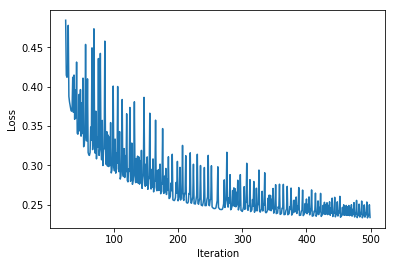

In [13]:
# %load nn_gd_solution.py
# number of layers (including output)
l = 3

# number of hidden units
n_hidden = [20,6]

# infer inputs and outputs for each layer
n_in = [X.shape[0]] + n_hidden
n_out = n_hidden + [1]

# make random initial weights and biases
pars = [{'weight' : np.random.randn(n_out[j],n_in[j]),
        'bias' : np.random.randn(n_out[j],1)} for j in range(l)]

# learning rate
learning_rate = 0.1

# number of steps for gradient descent
steps = 500

# initialize list to hold losses over time
losses = []

# train the network
for i in tqdm(range(steps)):
    
    # forward and backward pass (2 lines)
    As, Hs = forward(X,pars)
    grads = backprop(X,y,As,Hs,pars)
    
    # parameter updates (loop over layers)
    for j in range(l):
        pars[j]['weight'] -= learning_rate * grads[j]['weight']
        pars[j]['bias'] -= learning_rate * grads[j]['bias']
    
    # calculate cross-entropy loss 
    yhat = Hs[-1]
    loss = cross_entropy(yhat,y)
    losses.append(loss)

# visualise learning over time
plt.plot(range(steps),losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')